### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Loading Mnist Dataset

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

## Checking Contents

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0]

5

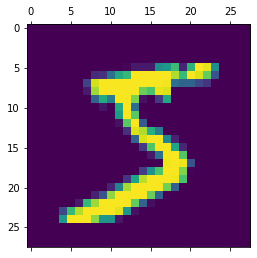

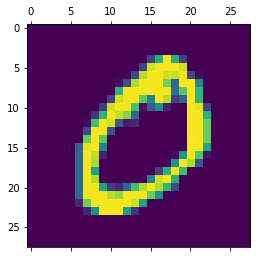

In [7]:
for i in range(2):
    plt.matshow(X_train[i])

### Scaling Training and Test Data

In [8]:
X_train = X_train/255
X_test = X_test/255

## Flattening to 1-D

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Building Keras Model

In [11]:
model = keras.Sequential ([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
 )

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7237 - accuracy: 0.8101
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3087 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.9216
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9260


### After Scaling

In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.9260


[0.2684227526187897, 0.9259999990463257]

## Testing the Model

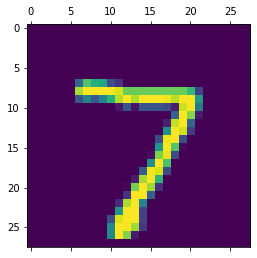

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.4936368e-02, 2.6016716e-07, 6.9817781e-02, 9.5198309e-01,
       2.2808909e-03, 1.4700007e-01, 1.7111855e-06, 9.9985898e-01,
       1.1638883e-01, 6.3467699e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

## Create Confusion Matrix and Heatmap

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:10])
print(y_test[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
[7 2 1 0 4 1 4 9 5 9]


In [17]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

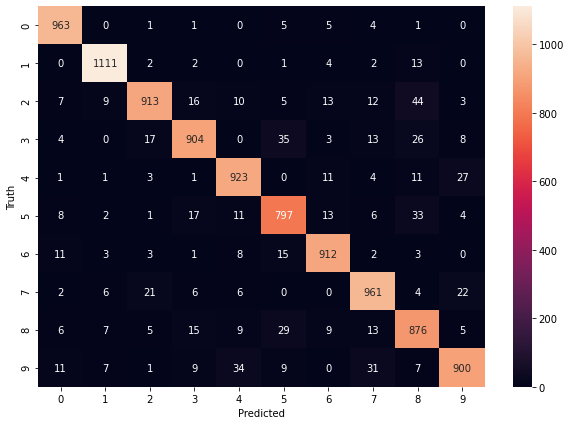

In [18]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a Hidden Layer

In [19]:
model = keras.Sequential ([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
 )

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4656 - accuracy: 0.8701
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1354 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0911 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9846


In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9743


[0.0838032141327858, 0.9743000268936157]

#### You can see that by adding a hidden layer accuracy went up to 0.9738

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
[7 2 1 0 4 1 4 9 5 9]


Text(69.0, 0.5, 'Truth')

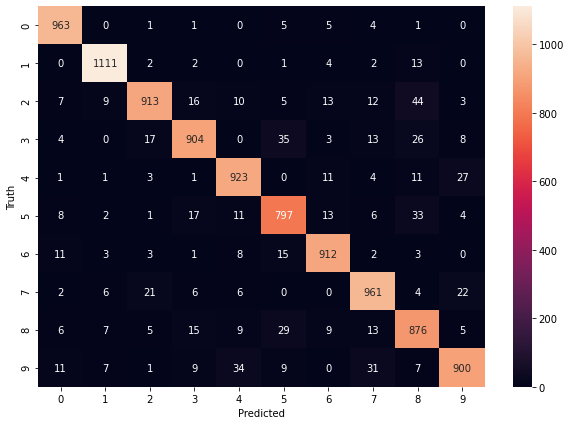

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:10])
print(y_test[:10])

cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Extra

### Keras inbuilt Flatten method

In [22]:
model = keras.Sequential ([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
 )

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4489 - accuracy: 0.8741
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1276 - accuracy: 0.9618: 0s - loss: 0.1277 - accuracy: 0.
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0296 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0258 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9939
Epoch 10/10
1875/1875 [=========================

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9773


[0.08404760807752609, 0.9772999882698059]